In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LENDO OS DADOS

In [2]:
df_upp = pd.read_csv('upp.csv')
upp = pd.read_csv('upp.csv')
display(upp.head())

,cod_upp,upp,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,...,armas_apreendidas,cump_mandado_prisao,ocorr_flagrante,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
0,1,Santa Marta,2007,1,0,0,0,0,0,1,...,2,1,0,0,0,0,0,0,0,11
1,2,Cidade de Deus,2007,1,3,0,0,0,1,18,...,7,2,11,7,2,0,0,0,0,98
2,3,Batam,2007,1,0,0,0,0,0,4,...,0,0,0,1,0,0,0,0,0,19
3,4,Chapéu Mangueira / Babilônia,2007,1,0,0,0,0,0,1,...,0,2,0,1,0,0,0,0,0,9
4,5,Pavão-Pavãozinho,2007,1,0,0,0,0,0,4,...,0,0,0,1,1,0,0,0,0,12


FILTROS
#Filtros para o gráfico
# hd_ano = upp.groupby['hom_doloso']

# display(df_pandas["UF"].describe())

# (df_pandas[df_pandas["MÊS COMPETÊNCIA"]==202401])
# display(hd_ano)
display(upp.groupby('ano')['registro_ocorrencias'].value_counts())
#Somar ocorrências violentas por UPP e ano

#Ocorrências violentas por UPP e ano
ocorrencias_violentas = df_upp.groupby(['upp', 'ano'])[['hom_doloso', 'latrocinio', 'tentat_hom', 'estupro']].sum()
display(ocorrencias_violentas)

#Tendência anual de homicídios dolosos
tendencia_hom_doloso = df_upp.groupby('ano')['hom_doloso'].sum()
display(tendencia_hom_doloso)

# Para observar as ocorrências mensais em 2019, por exemplo:
df_upp_2019 = df_upp[df_upp['ano'] == 2019].groupby('mes')['registro_ocorrencias'].sum()
display(df_upp_2019)

# Tendência anual de homicídios dolosos
tendencia_hom_doloso = df_upp.groupby('ano')['hom_doloso'].sum()
display(tendencia_hom_doloso)

# Para observar as ocorrências mensais em 2019, por exemplo:
df_upp_2019 = df_upp[df_upp['ano'] == 2019].groupby('mes')['registro_ocorrencias'].sum()
display(df_upp_2019)

# Total de roubos por UPP e ano
roubos_por_upp = df_upp.groupby(['upp', 'ano'])[['roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'total_roubos']].sum()
display(roubos_por_upp)

# Percentual de roubos em relação ao total de ocorrências
df_upp['percentual_roubos'] = (df_upp['total_roubos'] / df_upp['registro_ocorrencias']) * 100
display(df_upp[['upp', 'ano', 'total_roubos', 'registro_ocorrencias', 'percentual_roubos']].head())

# Apreensões por UPP e ano
apreensoes_por_upp = df_upp.groupby(['upp', 'ano'])[['apreensao_drogas', 'recuperacao_veiculos', 'armas_apreendidas']].sum()
display(apreensoes_por_upp)

# Casos de desaparecimento e mortes de policiais por UPP
desaparecimentos_mortes = df_upp.groupby(['upp'])[['pessoas_desaparecidas', 'pol_militares_mortos_serv', 'pol_civis_mortos_serv']].sum()
display(desaparecimentos_mortes)


# Calcular média, variância e desvio-padrão de registro de ocorrências por UPP
variabilidade_upp = df_upp.groupby("upp")["registro_ocorrencias"].agg(['mean', 'var', 'std'])
print("Variabilidade por UPP:")
print(variabilidade_upp)

#Total de Registros de Ocorrencia por UPP
ro = df_upp.groupby("upp")["registro_ocorrencias"].sum()

#Percentual de registro de ocorrencias por ano
pro = (df_upp.groupby("ano")["registro_ocorrencias"].sum() / df_upp.groupby("ano")["registro_ocorrencias"].sum().sum()).sort_values()*100

#Transformando percentual em array
arr_ro = np.array(pro)
display(arr_ro)

R

In [4]:
arr=np.array(upp['registro_ocorrencias'])

In [5]:
#Total de Registros de Ocorrencia por UPP
ro = df_upp.groupby("upp")["registro_ocorrencias"].sum()

#Percentual de registro de ocorrencias por ano
pro = (df_upp.groupby("ano")["registro_ocorrencias"].sum() / df_upp.groupby("ano")["registro_ocorrencias"].sum().sum()).sort_values()*100 

#Transformando percentual em array
arr_ro = np.array(pro)
display(arr_ro)

array([4.26000698, 4.37017098, 4.66327701, 4.74153831, 5.0600668 ,
       5.84916006, 6.98021036, 7.40541349, 7.43731619, 7.86551019,
       7.88544938, 7.92582623, 8.27276806, 8.47415383, 8.80913215])

**Resumos Estátisticos**

In [7]:
#Cálculo dos Quartis:
q1=np.percentile(arr_ro,25) # o primeiro quartil representa 25% do total da amostra
q2=np.percentile(arr_ro,50) # mediana pode ser interpretada como o seu segundo quartil (quartil 50)
q3=np.percentile(arr_ro,75) # o terceiro quartil representa do total da amostra

#Resumo Estátistico:
media = np.mean(arr_ro)
mediana = np.median(arr_ro)
distancia = (media-mediana)/mediana*100

#Cálculos para verificação de intervalo InterQuartil (IQR) e seus limites:
iqr=q3-q1
limite_superior=q3+(1.5*iqr)
limite_inferior=q1-(1.5*iqr)


#INTERVALO INTERQUARTIL:
if q1 <= media <= q3:
    print("A média está DENTRO do intervalo interquartil, o que sugere confiabilidade.")
else:
    print("A média está FORA do intervalo interquartil, o que sugere MENOS confiabilidade.")



#Resumo Estatísticos:
print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Distância entre média e mediana: {distancia:.2f}%")
print(f"Primeiro Quartil (Q1): {q1}")
print(f"Segundo Quartil (Q2): {q2}")
print(f"Terceiro Quartil (Q3): {q3}")
print(f"Intervalo InterQuartil: {iqr}")
print(f"Limite Superior: {limite_superior}")
print(f"Limite Inferior: {limite_inferior}")

A média está DENTRO do intervalo interquartil, o que sugere confiabilidade.
Média: 6.666666666666667
Mediana: 7.405413488858981
Distância entre média e mediana: -9.98%
Primeiro Quartil (Q1): 4.900802552215742
Segundo Quartil (Q2): 7.405413488858981
Terceiro Quartil (Q3): 7.905637804695678
Intervalo InterQuartil: 3.0048352524799355
Limite Superior: 12.412890683415581
Limite Inferior: 0.3935496734958388


In [8]:
#Medidas de Dispersão 
valor_maximo = df_upp['registro_ocorrencias'].max()
valores_minimo = df_upp['registro_ocorrencias'].min()
amplitude_total = valor_maximo - valores_minimo

print(f"Menor Valor: {valores_minimo}")
print(f"Maior Valor: {valor_maximo}")
print(f"Amplitude: {amplitude_total}")

#diferenças em relação à média
diferencas=[x - media for x in arr]
display(diferencas)

Menor Valor: 0
Maior Valor: 328
Amplitude: 328


[np.float64(4.333333333333333),
 np.float64(91.33333333333333),
 np.float64(12.333333333333332),
 np.float64(2.333333333333333),
 np.float64(5.333333333333333),
 np.float64(-0.666666666666667),
 np.float64(24.333333333333332),
 np.float64(10.333333333333332),
 np.float64(-0.666666666666667),
 np.float64(25.333333333333332),
 np.float64(35.333333333333336),
 np.float64(13.333333333333332),
 np.float64(0.33333333333333304),
 np.float64(8.333333333333332),
 np.float64(1.333333333333333),
 np.float64(29.333333333333332),
 np.float64(24.333333333333332),
 np.float64(44.333333333333336),
 np.float64(-0.666666666666667),
 np.float64(-0.666666666666667),
 np.float64(9.333333333333332),
 np.float64(11.333333333333332),
 np.float64(-4.666666666666667),
 np.float64(5.333333333333333),
 np.float64(-5.666666666666667),
 np.float64(-1.666666666666667),
 np.float64(14.333333333333332),
 np.float64(4.333333333333333),
 np.float64(44.333333333333336),
 np.float64(12.333333333333332),
 np.float64(23.333

In [9]:
#elevando as diferenças ao quadrado
quadrados_das_diferencas=[x ** 2 for x in diferencas]
display(quadrados_das_diferencas)

#calcular a média dos quadrados das diferenças
variancia=sum(quadrados_das_diferencas)/len(quadrados_das_diferencas)
print(variancia)

#calcular o desvio-padrão (raiz quadrada da variância)
desviopadrao=variancia**0.5
print(desviopadrao)

[np.float64(18.777777777777775),
 np.float64(8341.777777777777),
 np.float64(152.1111111111111),
 np.float64(5.444444444444443),
 np.float64(28.444444444444443),
 np.float64(0.44444444444444486),
 np.float64(592.1111111111111),
 np.float64(106.77777777777776),
 np.float64(0.44444444444444486),
 np.float64(641.7777777777777),
 np.float64(1248.4444444444446),
 np.float64(177.77777777777774),
 np.float64(0.11111111111111091),
 np.float64(69.44444444444443),
 np.float64(1.777777777777777),
 np.float64(860.4444444444443),
 np.float64(592.1111111111111),
 np.float64(1965.4444444444446),
 np.float64(0.44444444444444486),
 np.float64(0.44444444444444486),
 np.float64(87.11111111111109),
 np.float64(128.44444444444443),
 np.float64(21.777777777777782),
 np.float64(28.444444444444443),
 np.float64(32.111111111111114),
 np.float64(2.7777777777777786),
 np.float64(205.4444444444444),
 np.float64(18.777777777777775),
 np.float64(1965.4444444444446),
 np.float64(152.1111111111111),
 np.float64(544.4

1537.5140961857137
39.21114760097839


**Cálculos com Pandas e Numpy**

In [10]:
display(arr)
#Numpy - cálculo da variância
variancia=np.var(arr)
print(variancia)

#Numpy - cálculo do desvio-padrão
desviopadrao=np.std(arr)
print(desviopadrao)

array([ 11,  98,  19, ...,  42,  31, 146])

1153.4300494879553
33.96218558173127


In [11]:
#Pandas - cálculo da variância
arr2=pd.Series(arr)
variancia=arr2.var()
print(variancia)

#Pandas - cálculo do desvio-padrão
desviopadrao=arr2.std()
print(desviopadrao)

display(arr2)

1153.5810813132125
33.96440903818603


0        11
1        98
2        19
3         9
4        12
       ... 
7633      5
7634     43
7635     42
7636     31
7637    146
Length: 7638, dtype: int64

In [12]:
#coeficiente de variação (CV) é o desvio-padrão dividido pela média
coef_variacao=desviopadrao/media
print(coef_variacao)

#cálculo da distância da variância em relação à média
distancia=variancia / (media**2)
print(distancia*100,'%')

5.0946613557279035
2595.557432954728 %


**Assimetria**

In [13]:
#Calculando a assimetria
assimetria=df_upp['registro_ocorrencias'].skew()
media=df_upp['registro_ocorrencias'].mean()
mediana=df_upp['registro_ocorrencias'].median()

print(f'Assimetria:{assimetria}')
print(f'Média:{media}')
print(f'Mediana:{mediana}')

#interpretação
if -0.5 <= assimetria <= 0.5:
    resultado="Distribuição Simétrica"
elif assimetria > 0.5:
    resultado="Distribuição Assimétrica Positiva"
else:
    resultado="Distribuição Assimétrica Negativa"

print(resultado)

Assimetria:3.435748394685452
Média:26.264728986645718
Mediana:17.0
Distribuição Assimétrica Positiva


**custose**

In [14]:
#Calculando a curtose
curtose=df_upp['registro_ocorrencias'].kurtosis()
print(f'Curtose:{curtose}')

#interpretação

if 2.5 <= curtose <= 3.5:
    resultado2="Distribuição Mesocúrtica"
elif curtose < 2.5:
    resultado2="Distribuição Platicúrtica"
else:
    resultado2="Distribuição Leptocúrtica"

print(resultado2)

Curtose:16.28406521509206
Distribuição Leptocúrtica


**graficos**

In [18]:
import matplotlib.pyplot as plt

In [ ]:
plt.boxplot(df_Salários['Salários'])
plt.title('Boxplot dos Salários')
plt.ylabel('Salário')
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (20,) and arg 1 with shape (7638, 42).

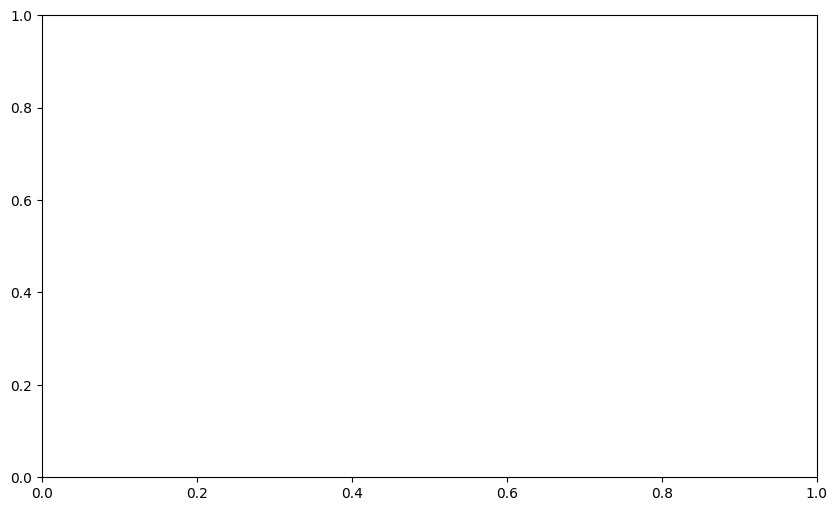

In [19]:
plt.figure(figsize=(10,6))
plt.bar(range(1,21), upp,color="pink")
plt.xlabel('Índices')
plt.ylabel('Valores Aleatórios')
plt.title('Gráfico de Barras dos 20 Números Aleatórios')
plt.xticks(range(1,21))
plt.show()